Tutorial Credit: https://blog.keras.io/building-autoencoders-in-keras.html

Let's build the simplest possible autoencoder

In [1]:
import keras
from keras import layers

#This is the size of our encoded representations
encoding_dim = 32 #32 floats -> compression of factor 24.5, assuming the input is 784 floats 

#This is our input image
input_img = keras.Input(shape = (784,))

#"encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation = 'relu')(input_img)

#"decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation = 'sigmoid')(encoded)

#This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

Let's also create a separate encoder model: 

In [2]:
#This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

Let's also create a separate decoder model:

In [3]:
#This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape = (encoding_dim,))

#Retrieve the las layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]

#Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer,(encoded_input))

Now let's train our autoencoder to reconstruct MNIST digits. 

First, we'll configure our model to use a per-pixel binary crossentropy loss, and the Adam optimizer: 

In [4]:
autoencoder.compile(optimizer = 'adam', loss = 'binary_crossentropy')

Let's prepare our input data. We're using MNIST digits, and we're discarding the labels (since we're only interested in encoding/decoding the input images).

In [5]:
from keras.datasets import mnist
import numpy as np
(xtrain, _), (xtest, _) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


We will normalize all values between 0 and 1 and we will flatten the 28x28 images into vectors of size 784.

In [6]:
xtrain = xtrain.astype('float32') / 255.
xtest = xtest.astype('float32') / 255.
xtrain = xtrain.reshape((len(xtrain), np.prod(xtrain.shape[1:])))
xtest = xtest.reshape((len(xtest), np.prod(xtest.shape[1:])))
print(xtrain.shape)
print(xtest.shape)

(60000, 784)
(10000, 784)


Now let's train our autoencoder for 50 epochs: 

In [8]:
autoencoder.fit(xtrain, xtrain,
               epochs = 50,
               batch_size = 256,
               shuffle = True,
               validation_data = (xtest, xtest))

Epoch 1/50
235/235 [==============================] - 15s 6ms/step - loss: 0.3862 - val_loss: 0.1882
Epoch 2/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1781 - val_loss: 0.1527
Epoch 3/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1485 - val_loss: 0.1332
Epoch 4/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1315 - val_loss: 0.1209
Epoch 5/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1199 - val_loss: 0.1124
Epoch 6/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1124 - val_loss: 0.1066
Epoch 7/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1071 - val_loss: 0.1026
Epoch 8/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1031 - val_loss: 0.0995
Epoch 9/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1002 - val_loss: 0.0971
Epoch 10/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0981 - val_loss: 0.095

After 50 epochs, the autoencoder seems to reach a stable train/validation loss value of about 0.09. We can try to visualize the reconstructioned inputs and the enconded representations. We will use Matplotlib.

In [24]:
#Encode and decode some digits
#Note that we take them from the *test* set
encoded_imgs = encoder.predict(xtest)
decoded_imgs = decoder.predict(encoded_imgs)

NotImplementedError: ignored

NameError: ignored

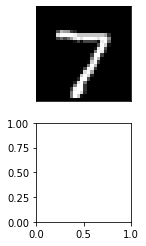

In [22]:
# Use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(xtest[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()